In [1]:
import pandas as pd
import numpy as np
import copy

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

In [2]:
maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'tuple'>
('1', '1', '0', '1', '1', '0', '0', '1')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ A □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import *
from utils.nxcs_utils import *

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_maze_metrics)

XNCScfg_no_mods = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100,
                    update_env_input = False,
                    cover_env_input = False,)

XNCScfg_update = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100,
                    update_env_input = True,
                    cover_env_input = False,)

XNCScfg_cover = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100,
                    update_env_input = False,
                    cover_env_input = True,)

XNCScfg_both = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100,
                    update_env_input = True,
                    cover_env_input = True,)

In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 10
explore = 0
exploit = 2500
print("Starting XCS")
df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=0,
             exploit_trials=exploit + explore,
             pre_generate=True
           )
print("Starting XNCS")
df_no_mods = XNCSExp(
    maze=maze,
    cfg=XNCScfg_no_mods,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )
print("Starting XNCS with enviromental input during cover")
df_cover = XNCSExp(
    maze=maze,
    cfg=XNCScfg_cover,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )
print("Starting XNCS with enviromental input during update")
df_update = XNCSExp(
    maze=maze,
    cfg=XNCScfg_update,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )
print("Starting XNCS with all enviromental inputs")
df_both = XNCSExp(
    maze=maze,
    cfg=XNCScfg_both,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True

)

Starting XCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during cover
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during update
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experim

In [5]:
df_all = pd.DataFrame(df)

df_all['steps_in_trial_no_mods']=df_no_mods['steps_in_trial']
df_all['steps_in_trial_update'] =df_update['steps_in_trial']
df_all['steps_in_trial_cover']  =df_cover['steps_in_trial']
df_all['steps_in_trial_both']   =df_both['steps_in_trial']

df_all['population_no_mods']=df_no_mods['population']
df_all['population_update'] =df_update['population']
df_all['population_cover']  =df_cover['population']
df_all['population_both']   =df_both['population']

df_all['average_specificity_no_mods']=df_no_mods['average_specificity']
df_all['average_specificity_update']=df_update['average_specificity']
df_all['average_specificity_cover']=df_cover['average_specificity']
df_all['average_specificity_both']=df_both['average_specificity']

df['fraction_accuracy_no_mods']=df_no_mods['fraction_accuracy']
df['fraction_accuracy_update']=df_update['fraction_accuracy']
df['fraction_accuracy_cover']=df_cover['fraction_accuracy']
df['fraction_accuracy_both']=df_both['fraction_accuracy']

df['knowledge_no_mods']=df_no_mods['knowledge']
df['knowledge_update']=df_update['knowledge']
df['knowledge_cover']=df_cover['knowledge']
df['knowledge_both']=df_both['knowledge']

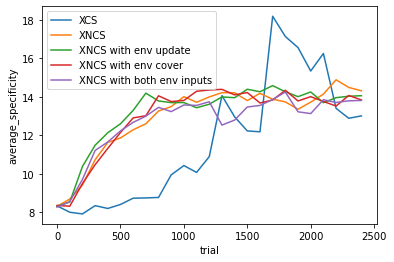

In [6]:
ax = df[['average_specificity',
         "average_specificity_no_mods",
         "average_specificity_update",
         "average_specificity_cover",
         "average_specificity_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

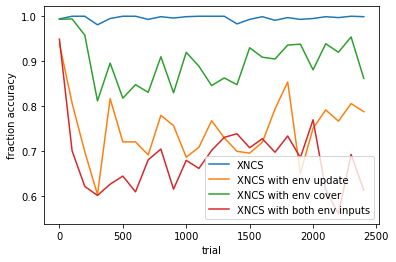

In [7]:
ax = df[["fraction_accuracy_no_mods",
         "fraction_accuracy_update",
         "fraction_accuracy_cover",
         "fraction_accuracy_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

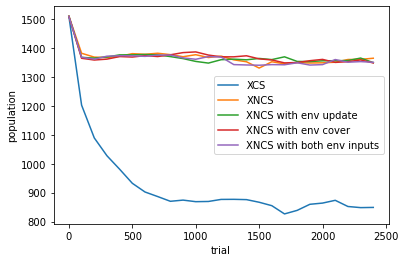

In [8]:
ax = df[['population',
         "population_no_mods",
         "population_update",
         "population_cover",
         "population_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

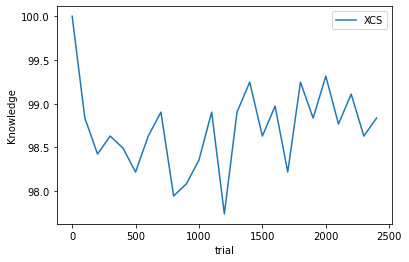

In [9]:
ax = df['knowledge'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["XCS"])

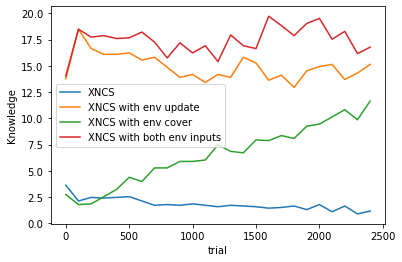

In [10]:
ax = df[["knowledge_no_mods",
         "knowledge_update",
         "knowledge_cover",
         "knowledge_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

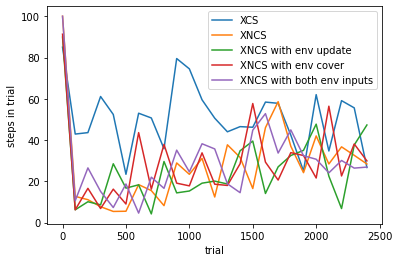

In [11]:
ax = df[['steps_in_trial',
         "steps_in_trial_no_mods",
         "steps_in_trial_update",
         "steps_in_trial_cover",
         "steps_in_trial_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

In [12]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_no_mods"])/number_of_experiments)
print(sum(df["steps_in_trial_update"])/number_of_experiments)
print(sum(df["steps_in_trial_cover"])/number_of_experiments)
print(sum(df["steps_in_trial_both"])/number_of_experiments)

127.03999999999999
70.00000000000001
64.45
72.22
73.51


In [13]:
display(df)
display(df_no_mods)
display(df_update)
display(df_cover)
display(df_both)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,knowledge,steps_in_trial_no_mods,steps_in_trial_update,steps_in_trial_cover,...,average_specificity_cover,average_specificity_both,fraction_accuracy_no_mods,fraction_accuracy_update,fraction_accuracy_cover,fraction_accuracy_both,knowledge_no_mods,knowledge_update,knowledge_cover,knowledge_both
trial,,,,,,,,,,,,,,,,,,,,,
0,85.0,300.000000,1.191221,1510.0,1600.0,8.328125,100.000000,100.0,89.9,91.3,...,8.349375,8.261312,0.994,0.939329,0.993333,0.949,3.630137,13.767123,2.739726,14.041096
100,42.9,902.100631,0.387646,1202.9,1600.0,7.997187,98.835616,12.7,6.2,6.2,...,8.311687,8.553250,1.000,0.807000,0.994000,0.701,2.123288,18.493151,1.780822,18.493151
200,43.6,833.490836,0.413924,1089.5,1600.0,7.909750,98.424658,11.1,10.1,16.6,...,9.489250,9.701312,1.000,0.699000,0.958000,0.622,2.465753,16.643836,1.849315,17.739726
300,61.1,656.712878,0.461141,1027.7,1600.0,8.339875,98.630137,7.7,8.6,6.8,...,10.471750,11.211813,0.981,0.604000,0.812000,0.602,2.397260,16.095890,2.534247,17.876712
400,52.4,746.225718,0.392082,981.1,1600.0,8.193750,98.493151,5.4,28.5,16.2,...,11.320375,11.653937,0.995,0.817000,0.896000,0.627,2.465753,16.095890,3.219178,17.602740
500,23.4,994.577423,0.192662,932.4,1600.0,8.401375,98.219178,5.5,16.7,9.0,...,12.145875,12.230000,1.000,0.721000,0.818000,0.645,2.534247,16.232877,4.383562,17.671233
600,53.0,634.390109,0.414508,902.3,1600.0,8.728063,98.630137,18.4,18.3,43.6,...,12.907250,12.673312,1.000,0.721000,0.848000,0.610,2.123288,15.547945,3.972603,18.219178
700,50.7,649.666367,0.389747,886.5,1600.0,8.742313,98.904110,15.5,4.2,16.2,...,13.017875,12.996437,0.993,0.692000,0.831000,0.681,1.712329,15.821918,5.273973,17.260274
800,35.8,764.088633,0.258304,870.1,1600.0,8.766750,97.945205,8.2,29.6,37.9,...,14.057188,13.453875,0.999,0.780000,0.910000,0.705,1.780822,14.863014,5.273973,15.753425


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy,knowledge
trial,,,,,,,,
0,100.0,0.000000,1.987470,1600.0,1510.8,8.308250,0.994,3.630137
100,12.7,1143.693241,0.184109,1600.0,1382.6,8.683187,1.000,2.123288
200,11.1,1135.890152,0.172946,1600.0,1369.3,9.408625,1.000,2.465753
300,7.7,1134.481622,0.146286,1600.0,1368.0,10.727875,0.981,2.397260
400,5.4,1332.124940,0.075260,1600.0,1372.0,11.629312,0.995,2.465753
500,5.5,1234.261113,0.087966,1600.0,1381.3,11.864250,1.000,2.534247
600,18.4,986.630140,0.290642,1600.0,1379.1,12.288625,1.000,2.123288
700,15.5,1179.700931,0.245414,1600.0,1382.7,12.600750,0.993,1.712329
800,8.2,1120.103988,0.131227,1600.0,1377.9,13.262250,0.999,1.780822


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy,knowledge
trial,,,,,,,,
0,89.9,300.000000,1.304203,1600.0,1510.7,8.307813,0.939329,13.767123
100,6.2,1199.275608,0.079113,1600.0,1368.5,8.529063,0.807000,18.493151
200,10.1,1043.152310,0.139833,1600.0,1365.9,10.377812,0.699000,16.643836
300,8.6,1115.734442,0.118419,1600.0,1369.8,11.483687,0.604000,16.095890
400,28.5,1077.054835,0.299209,1600.0,1377.1,12.134937,0.817000,16.095890
500,16.7,1073.934972,0.176222,1600.0,1377.1,12.599250,0.721000,16.232877
600,18.3,1139.647781,0.218719,1600.0,1378.4,13.296312,0.721000,15.547945
700,4.2,1403.302122,0.051877,1600.0,1377.1,14.193938,0.692000,15.821918
800,29.6,868.251867,0.348858,1600.0,1371.1,13.786812,0.780000,14.863014


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy,knowledge
trial,,,,,,,,
0,91.3,300.000000,1.484179,1600.0,1510.1,8.349375,0.993333,2.739726
100,6.2,1179.990786,0.085638,1600.0,1365.3,8.311687,0.994000,1.780822
200,16.6,1198.748394,0.206339,1600.0,1359.2,9.489250,0.958000,1.849315
300,6.8,1272.130475,0.087462,1600.0,1362.3,10.471750,0.812000,2.534247
400,16.2,1026.256475,0.208477,1600.0,1371.2,11.320375,0.896000,3.219178
500,9.0,1113.337050,0.134420,1600.0,1369.5,12.145875,0.818000,4.383562
600,43.6,736.201689,0.524529,1600.0,1374.4,12.907250,0.848000,3.972603
700,16.2,1009.127951,0.215978,1600.0,1371.3,13.017875,0.831000,5.273973
800,37.9,848.436459,0.458693,1600.0,1377.3,14.057188,0.910000,5.273973


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy,knowledge
trial,,,,,,,,
0,100.0,0.000000,1.477397,1600.0,1510.2,8.261312,0.949,14.041096
100,10.6,1063.763228,0.134289,1600.0,1368.7,8.553250,0.701,18.493151
200,26.5,971.945407,0.290099,1600.0,1362.3,9.701312,0.622,17.739726
300,15.1,1068.209570,0.159054,1600.0,1372.5,11.211813,0.602,17.876712
400,7.3,1238.506377,0.103793,1600.0,1374.1,11.653937,0.627,17.602740
500,18.7,1073.975228,0.202867,1600.0,1373.9,12.230000,0.645,17.671233
600,4.6,1269.816342,0.060722,1600.0,1371.9,12.673312,0.610,18.219178
700,22.0,967.507485,0.255501,1600.0,1376.3,12.996437,0.681,17.260274
800,16.6,1125.447442,0.183027,1600.0,1376.5,13.453875,0.705,15.753425
